<a href="https://colab.research.google.com/github/AaratrikaSantra/AirQualityPrediction/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Timehacks_synchronize2.csv', nrows=5000)

In [ ]:
data = raw_data.copy()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
data = pd.get_dummies(data)

# Split into features (X) and target variable (y)
X = data.drop(columns=['pm2_5'])  # Features (excluding the target column)
y = data['pm2_5']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
xtrain, xtest, ytrain, ytest = train_test_split(data[['timestamp', 'temperature', 'longitude', 'latitude', 'humidity']], data[['pm2_5','pm10']], test_size=0.2, random_state=42)data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'] = data['timestamp'].apply(lambda x: x.timestamp())

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X)

In [ ]:
# Create Gradient Boosting Regressor objects
model1 = GradientBoostingRegressor(random_state=42)
model2 = GradientBoostingRegressor(random_state=42)

# Train the models using the training sets
model1.fit(xtrain, ytrain['pm2_5'])
model2.fit(xtrain, ytrain['pm10'])

# Make predictions using the testing set
y_pred1 = model1.predict(xtest)
y_pred2 = model2.predict(xtest)

# Calculate metrics for 'pm2_5'
mse1 = mean_squared_error(ytest['pm2_5'], y_pred1)
r2_1 = r2_score(ytest['pm2_5'], y_pred1)
rmse1 = np.sqrt(mse1)

# Calculate metrics for 'pm10'
mse2 = mean_squared_error(ytest['pm10'], y_pred2)
r2_2 = r2_score(ytest['pm10'], y_pred2)
rmse2 = np.sqrt(mse2)

# Print metrics
print("Metrics for 'pm2_5':")
print(f"Mean squared error: {mse1:.2f}")
print(f"Root Mean squared error: {rmse1:.2f}")
print(f"Coefficient of determination: {r2_1:.2f}")
print('Mean absolute error: %.2f' % mean_absolute_error(ytest['pm2_5'], y_pred1))

print("\nMetrics for 'pm10':")
print(f"Mean squared error: {mse2:.2f}")
print(f"Root Mean squared error: {rmse2:.2f}")
print(f"Coefficient of determination: {r2_2:.2f}")
print('Mean absolute error: %.2f' % mean_absolute_error(ytest['pm10'], y_pred2))

Metrics for 'pm2_5':
Mean squared error: 448.22
Root Mean squared error: 21.17
Coefficient of determination: 0.85
Mean absolute error: 15.39

Metrics for 'pm10':
Mean squared error: 554.90
Root Mean squared error: 23.56
Coefficient of determination: 0.84
Mean absolute error: 17.01


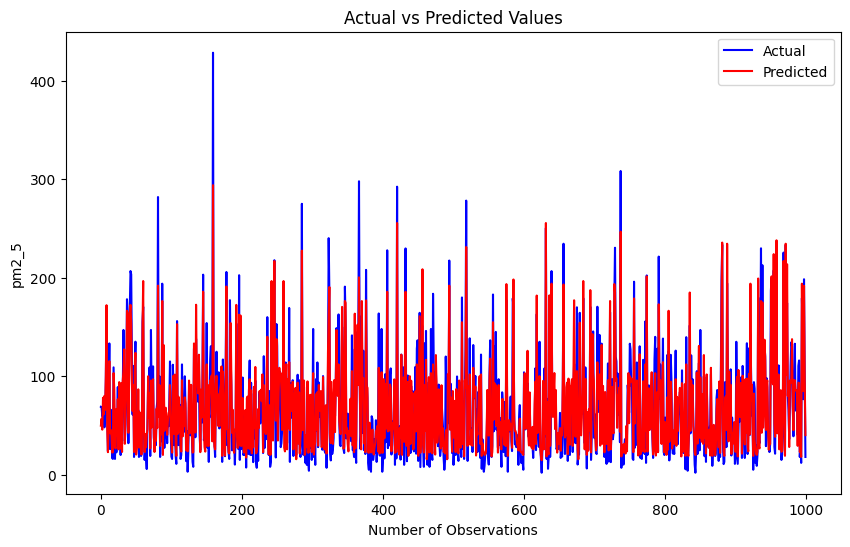

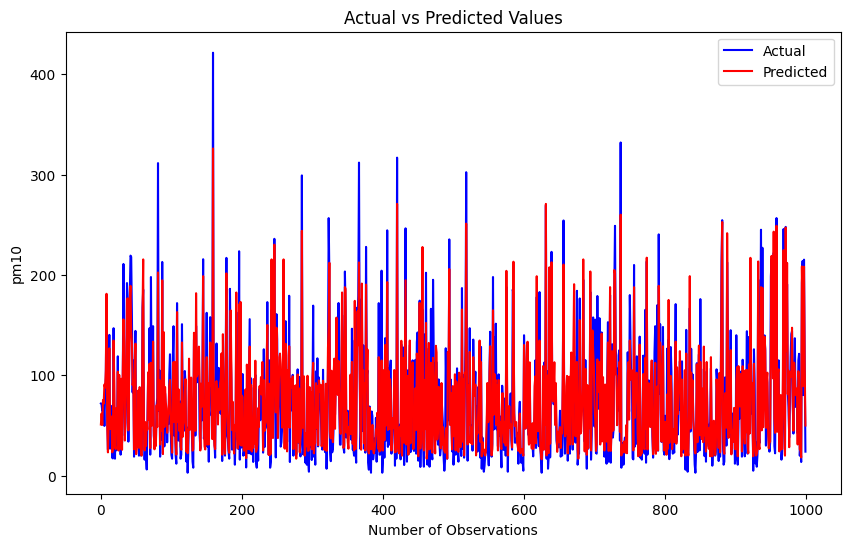

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(ytest['pm2_5'].values, color='blue', label='Actual')
plt.plot(y_pred1, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Number of Observations')
plt.ylabel('pm2_5')
plt.legend()
plt.show()


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(ytest['pm10'].values, color='blue', label='Actual')
plt.plot(y_pred2, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Number of Observations')
plt.ylabel('pm10')
plt.legend()
plt.show()

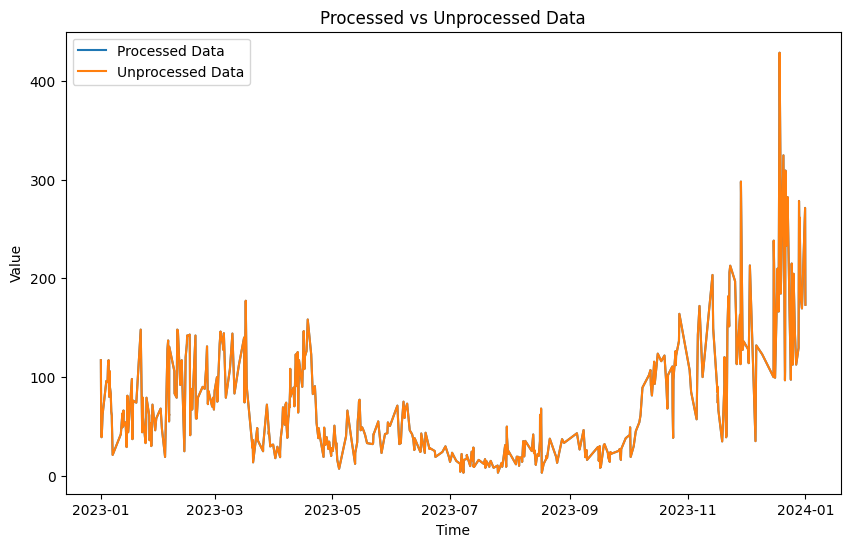

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plot processed data
plt.plot(data['timestamp'], data['pm2_5'], label='Processed Data')

# Plot unprocessed data
plt.plot(raw_data['timestamp'], raw_data['pm2_5'], label='Unprocessed Data')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Processed vs Unprocessed Data')
plt.legend()
plt.show()

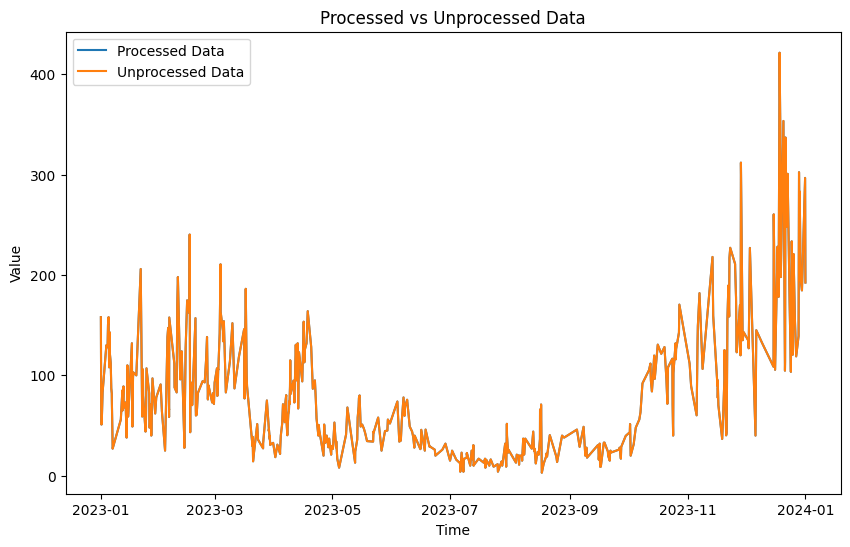

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plot processed data
plt.plot(data['timestamp'], data['pm10'], label='Processed Data')

# Plot unprocessed data
plt.plot(raw_data['timestamp'], raw_data['pm10'], label='Unprocessed Data')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Processed vs Unprocessed Data')
plt.legend()
plt.show()

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'] = data['timestamp'].apply(lambda x: x.timestamp())

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data[['timestamp', 'pm2_5', 'longitude', 'latitude', 'humidity']], data[['temperature']], test_size=0.2, random_state=42)


In [ ]:
# Create Gradient Boosting Regressor objects
model1 = GradientBoostingRegressor(random_state=42)

# Train the models using the training sets
model1.fit(xtrain, ytrain['temperature'])


# Make predictions using the testing set
y_pred1 = model1.predict(xtest)


# Calculate metrics for 'pm2_5'
mse1 = mean_squared_error(ytest['temperature'], y_pred1)
r2_1 = r2_score(ytest['temperature'], y_pred1)
rmse1 = np.sqrt(mse1)


# Print metrics
print("Metrics for 'temperature':")
print(f"Mean squared error: {mse1:.2f}")
print(f"Root Mean squared error: {rmse1:.2f}")
print(f"Coefficient of determination: {r2_1:.2f}")
print('Mean absolute error: %.2f' % mean_absolute_error(ytest['temperature'], y_pred1))


Metrics for 'temperature':
Mean squared error: 1.88
Root Mean squared error: 1.37
Coefficient of determination: 0.94
Mean absolute error: 1.03


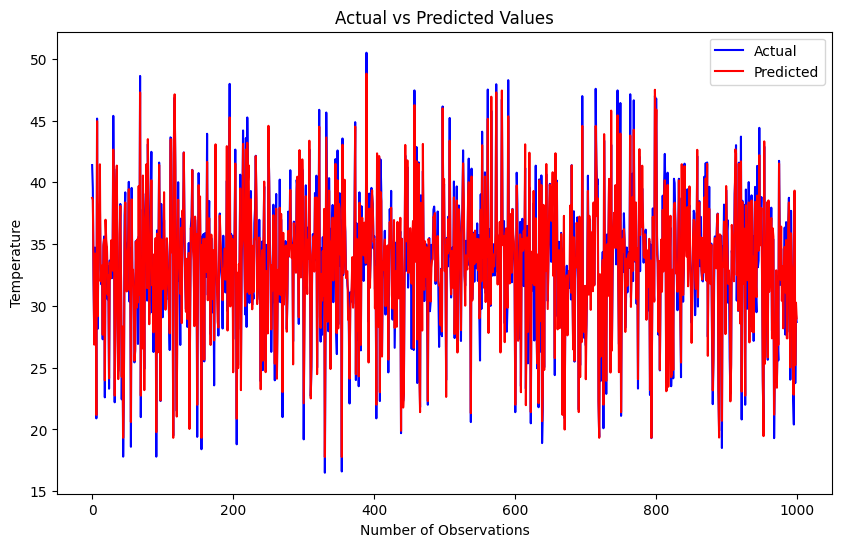

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(ytest['temperature'].values, color='blue', label='Actual')
plt.plot(y_pred1, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Number of Observations')
plt.ylabel('Temperature')
plt.legend()
plt.show()

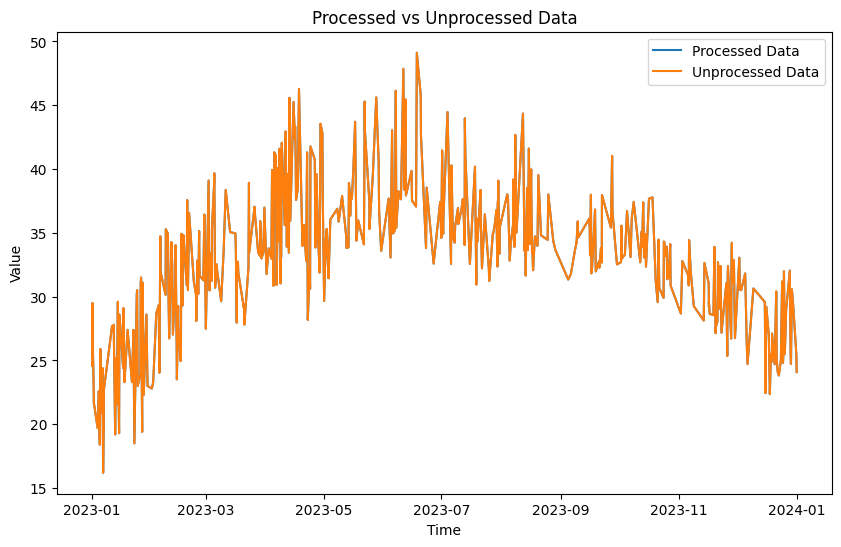

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plot processed data
plt.plot(data['timestamp'], data['temperature'], label='Processed Data')

# Plot unprocessed data
plt.plot(raw_data['timestamp'], raw_data['temperature'], label='Unprocessed Data')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Processed vs Unprocessed Data')
plt.legend()
plt.show()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data[['timestamp', 'pm2_5', 'longitude', 'latitude', 'temperature']], data[['humidity']], test_size=0.2, random_state=42)
# Create Gradient Boosting Regressor objects
model1 = GradientBoostingRegressor(random_state=42)

# Train the models using the training sets
model1.fit(xtrain, ytrain['humidity'])


# Make predictions using the testing set
y_pred1 = model1.predict(xtest)


# Calculate metrics for 'pm2_5'
mse1 = mean_squared_error(ytest['humidity'], y_pred1)
r2_1 = r2_score(ytest['humidity'], y_pred1)
rmse1 = np.sqrt(mse1)


# Print metrics
print("Metrics for 'humidity':")
print(f"Mean squared error: {mse1:.2f}")
print(f"Root Mean squared error: {rmse1:.2f}")
print(f"Coefficient of determination: {r2_1:.2f}")
print('Mean absolute error: %.2f' % mean_absolute_error(ytest['humidity'], y_pred1))

Metrics for 'humidity':
Mean squared error: 17.26
Root Mean squared error: 4.15
Coefficient of determination: 0.93
Mean absolute error: 3.16


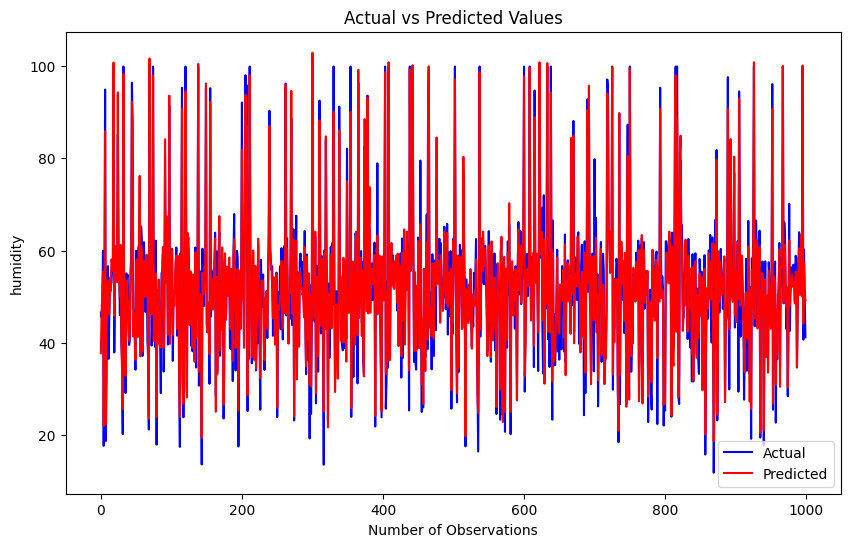

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(ytest['humidity'].values, color='blue', label='Actual')
plt.plot(y_pred1, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Number of Observations')
plt.ylabel('humidity')
plt.legend()
plt.show()

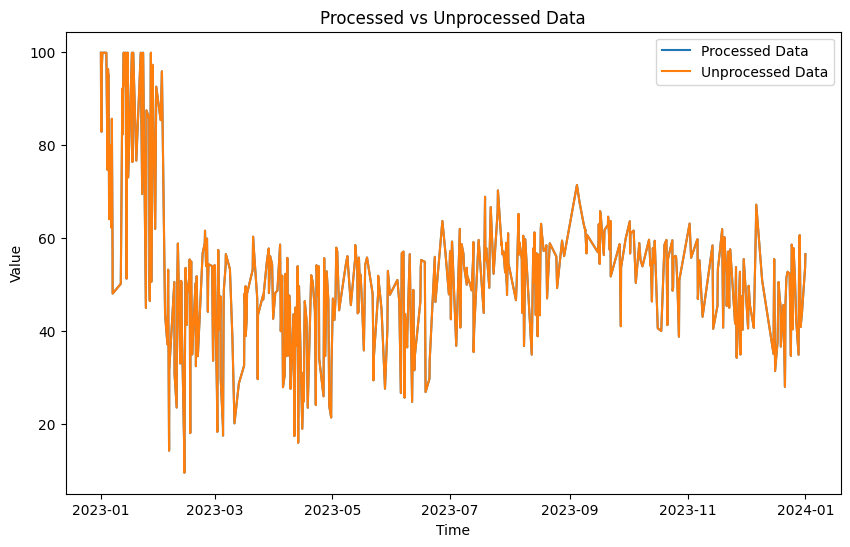

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Plot processed data
plt.plot(data['timestamp'], data['humidity'], label='Processed Data')

# Plot unprocessed data
plt.plot(raw_data['timestamp'], raw_data['humidity'], label='Unprocessed Data')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Processed vs Unprocessed Data')
plt.legend()
plt.show()
